In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler


def load(path: str) -> pd.DataFrame:
    """Load a CSV file into a Dataset object.

    Args:
        path (str): path to the CSV file

    Returns:
        Dataset: object containing the data
    """
    try:
        if not path.lower().endswith(("csv")):
            raise AssertionError("Only csv formats are supported.")
        local_dir = os.path.abspath('')
        file_path = os.path.join(local_dir, path)
        if not os.path.exists(file_path) or os.path.isdir(file_path):
            raise AssertionError("File not found:", file_path)
        df = pd.read_csv(file_path)
        return df
    except AssertionError as error:
        print(f"{AssertionError.__name__}: {error}")
        return None

In [2]:
test_knight = load("/home/lcompieg/sgoinfre/Test_knight.csv")
train_knight = load("/home/lcompieg/sgoinfre/Train_knight.csv")

In [3]:
# copy the data 
normalized_data = test_knight.copy() 
  
# apply normalization techniques 
for column in normalized_data.columns: 
    normalized_data[column] = normalized_data[column]  / normalized_data[column].abs().max() 
      
# view normalized data 
display(normalized_data) 

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Recovery,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping
0,0.419544,0.602780,0.426030,0.171600,0.872093,0.821946,0.565604,0.522863,0.893668,1.000000,...,0.450045,0.534921,0.431182,0.165414,1.000000,0.928809,0.809260,0.898151,1.000000,1.000000
1,0.670463,0.590949,0.656782,0.462222,0.579131,0.315576,0.264058,0.367793,0.617343,0.589286,...,0.690613,0.558337,0.668120,0.467949,0.687321,0.276187,0.445806,0.673875,0.461434,0.483699
2,0.539309,0.595386,0.520264,0.304222,0.603856,0.208454,0.173266,0.261382,0.545767,0.607759,...,0.575611,0.623335,0.538160,0.331585,0.697807,0.200600,0.343308,0.561214,0.456312,0.474913
3,0.497428,0.424726,0.480286,0.251689,0.598470,0.235350,0.156139,0.237624,0.648658,0.591749,...,0.456082,0.388777,0.434802,0.207226,0.686368,0.190093,0.281574,0.449250,0.448478,0.419595
4,0.563556,0.421769,0.562878,0.313067,0.656671,0.618124,0.486645,0.484891,0.867515,0.721675,...,0.545427,0.385143,0.545573,0.285810,0.662536,0.638362,0.742813,0.834670,0.703073,0.574913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.346179,0.824608,0.325426,0.120578,0.497124,0.143920,0.000000,0.000000,0.599449,0.621819,...,0.316631,0.691159,0.290013,0.096329,0.511439,0.076745,0.000000,0.000000,0.372853,0.402832
167,0.536003,0.670807,0.529325,0.292044,0.518543,0.385061,0.241097,0.185686,0.500344,0.630850,...,0.467250,0.550464,0.461840,0.213724,0.489037,0.339981,0.431433,0.385420,0.340163,0.462659
168,0.768553,0.742088,0.785283,0.598667,0.672583,0.647365,0.743674,0.732604,0.739504,0.705973,...,0.733172,0.593662,0.781073,0.530012,0.670639,0.448805,0.777451,0.886641,0.441247,0.570694
169,0.609846,0.830524,0.594728,0.381378,0.517442,0.296178,0.216753,0.263519,0.547144,0.579639,...,0.572895,0.688736,0.552551,0.327506,0.542898,0.331725,0.400919,0.494594,0.334137,0.452023


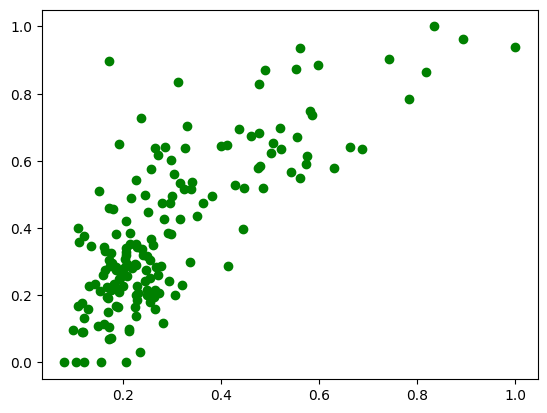

In [4]:
plt.scatter(normalized_data['Power'], normalized_data['Empowered'], c='green')

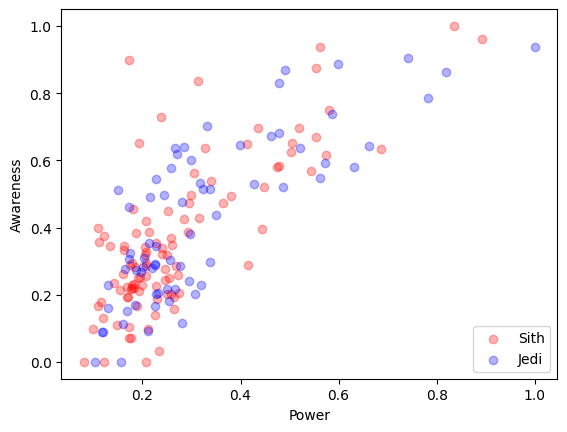

In [5]:
knight = train_knight[train_knight.columns[-1]]
data_joint = pd.concat([pd.DataFrame(normalized_data), knight], axis=1)
colors = {'Sith': 'red', 'Jedi': 'blue'}
knight_types = train_knight['knight'].unique()

for knight_type in knight_types:
    subset2 = data_joint[data_joint['knight'] == knight_type]  
    plt.scatter(subset2['Power'], subset2['Empowered'], label=knight_type, c=colors[knight_type], alpha=0.3)

plt.xlabel('Power')
plt.ylabel('Awareness')

plt.legend()

plt.show()